In [ ]:
import pandas
import geopandas 
import matplotlib.pyplot as plt
from   matplotlib.pyplot import imread
import matplotlib.patches as mpatches
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import shapely.geometry as sgeom
from   shapely.geometry import LineString
from   shapely.geometry import MultiPoint
from   shapely.geometry import Point, Polygon

%matplotlib inline

In [ ]:
hispaniola_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/hispaniola.shp')
división_prov_muni_y_dist_muni = geopandas.read_file('../shape_files/rd_shapes/vectores/División_Prov_Muni_y_Dist_MuniUTM.shp')
limite_gdf                     = geopandas.read_file('../shape_files/rd_shapes/vectores/limite_frontera.shp')
fay_gdf                        = geopandas.read_file('../shape_files/rd_shapes/vectores/FAY.shp')
silueta_haiti_gdf              = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_haiti.shp')
silueta_rd_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_rd.shp')
PROVINCIAS_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/PROVINCIAS.shp')
RIOS_gdf                       = geopandas.read_file('../shape_files/rd_shapes/vectores/RIOS.shp')
cuencas_hidro_gdf              = geopandas.read_file('../shape_files/rd_shapes/cuencas_hidrograficas_rd/Cuencas_Hidrograficas_RD.shp')
cuencas_presas_gdf             = geopandas.read_file('../shape_files/rd_shapes/cuencas_presas/Presas-CuencasAporte.shp')


hispaniola_gdf                 = hispaniola_gdf.to_crs("EPSG:4326")
división_prov_muni_y_dist_muni = división_prov_muni_y_dist_muni.to_crs("EPSG:4326")
limite_gdf                     = limite_gdf.to_crs("EPSG:4326") 
fay_gdf                        = fay_gdf.to_crs("EPSG:4326") 
silueta_haiti_gdf              = silueta_haiti_gdf.to_crs("EPSG:4326") 
silueta_rd_gdf                 = silueta_rd_gdf.to_crs("EPSG:4326") 
PROVINCIAS_gdf                 = PROVINCIAS_gdf.to_crs("EPSG:4326")
RIOS_gdf                       = RIOS_gdf.to_crs("EPSG:4326")
cuencas_hidro_gdf              = cuencas_hidro_gdf.to_crs("EPSG:4326")
cuencas_presas_gdf             = cuencas_presas_gdf.to_crs("EPSG:4326")



breakingpoints_2021   = geopandas.read_file('breakpoints_2021/Breakpoints_2021.shp')

In [ ]:
DIR      =  '../shape_files'
Features = ['ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp',
            'ne_10m_land/ne_10m_land.shp', 
            'ne_10m_ocean/ne_10m_ocean.shp',
            'ne_10m_coastline/ne_10m_coastline.shp',
            'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp']

states_provinces_gdf = geopandas.read_file(f'{DIR}/{Features[0]}')
land_gdf             = geopandas.read_file(f'{DIR}/{Features[1]}')
ocean_gdf            = geopandas.read_file(f'{DIR}/{Features[2]}')
coastline_gdf        = geopandas.read_file(f'{DIR}/{Features[3]}')
countries_gdf        = geopandas.read_file(f'{DIR}/{Features[4]}')

In [ ]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

In [ ]:
# breaking_point_names_ = []
# for i in range(12):
#     breaking_point_names_.append(breakingpoints_rd_2021_reordered['Name'].iloc[i])
# breaking_point_names_
breaking_point_lat_lon = MultiPoint([(-71.758940, 18.031639),
                                     (-71.422536, 17.604198),
                                     (-71.099600, 18.207900),
                                     (-70.143719, 18.245448),
                                     (-69.893333, 18.476389),
                                     (-69.629739, 18.402116),
                                     (-68.699444, 18.155556),
                                     (-68.326406, 18.605578),
                                     (-69.336389, 19.205278),
                                     (-69.216253, 19.359804),
                                     (-69.936389, 19.665544),
                                     (-70.694444, 19.795833), 
                                     (-71.758479, 19.702891)])
breaking_point_names   = ['Southern Border Dom Rep/Haiti',
                          'Cabo Beata',
                          'Barahona',
                          'Punta Palenque',
                          'Santo Domingo',
                          'Cabo Caucedo',
                          'Isla Saona',
                          'Cabo Engano',
                          'Samana',
                          'Cabo Cabron',
                          'Cabo Frances Viejo',
                          'Puerto Plata',
                          'Northern Border Dom Rep/Haiti']

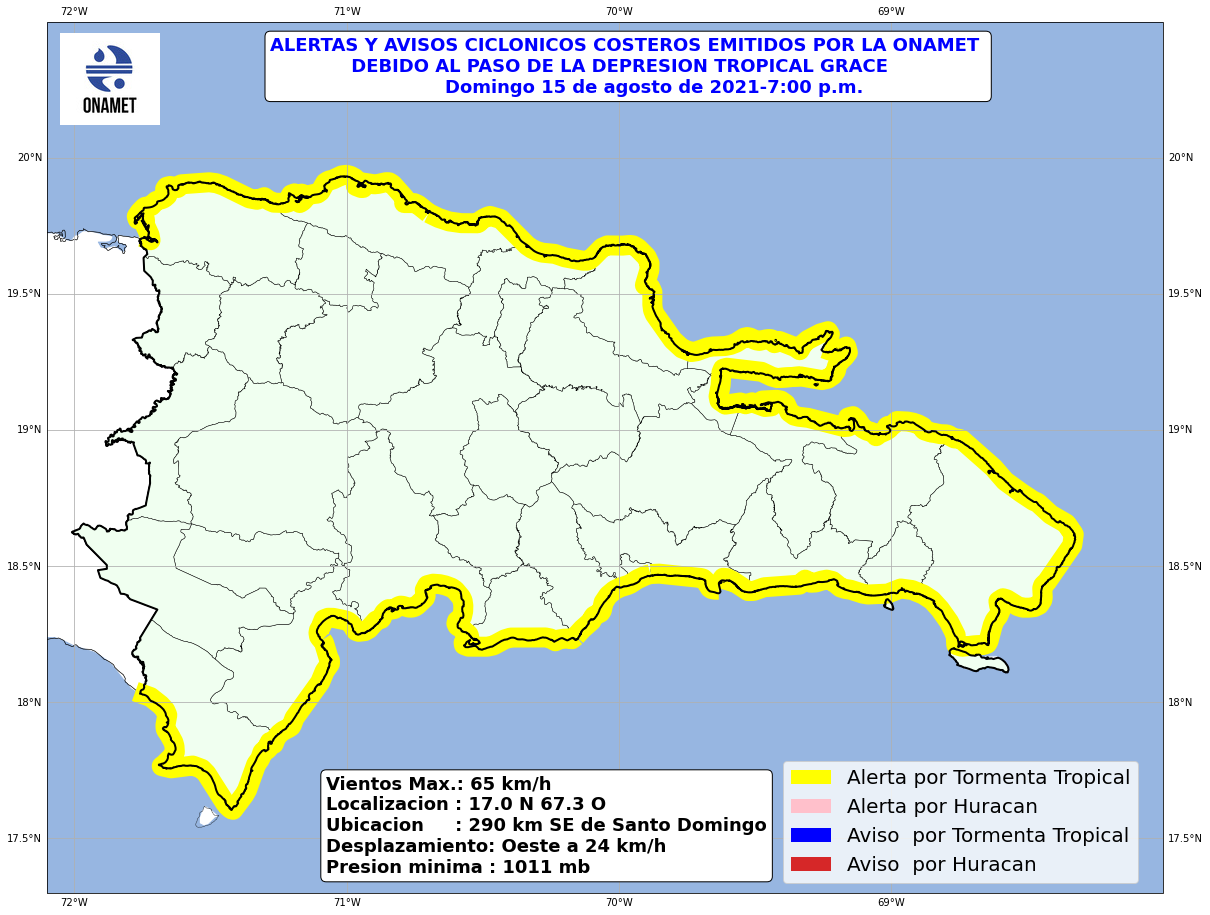

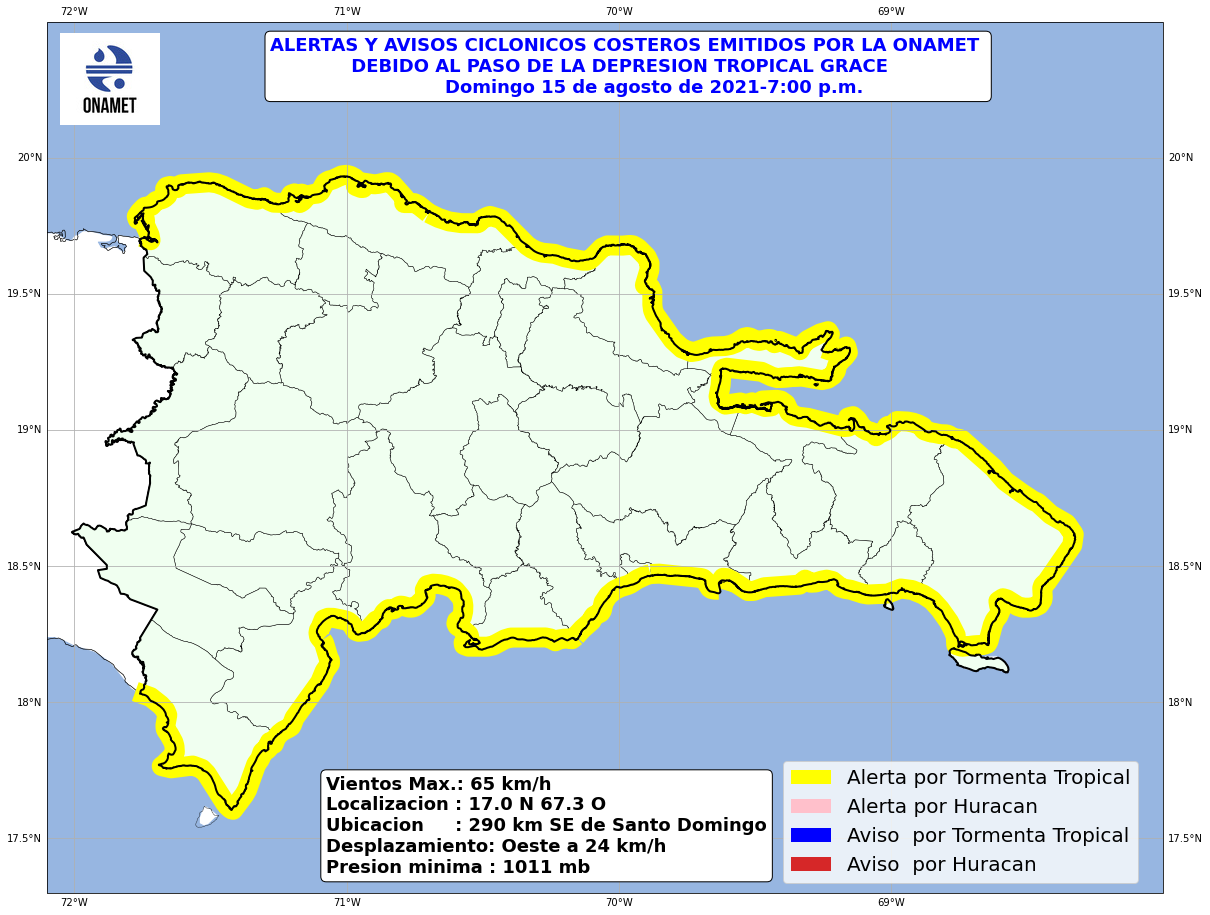

In [8]:
p_ext = np.array(np.array(countries_gdf.loc[countries_gdf['ADMIN'] == 
        'Dominican Republic']['geometry'])[0][0].exterior.coords[:])
multi_points = MultiPoint(p_ext)

#p_bkp = np.array(list(breakingpoints_rd_2021_reordered['geometry'])[0].coords[0])
#bkps = list(breakingpoints_rd_2021_reordered['geometry'])

idxs      = [458, 435, 403, 325, 309, 300, 268, 244, 165, 150, 110, 83, 0]
nb_pp     = LineString(multi_points[0:84])
pp_cfv    = LineString(multi_points[83:112])
cfv_cc    = LineString(multi_points[110:152])
cc_smn    = LineString(multi_points[152:167])
smn_ce    = LineString(multi_points[165:245])
ce_is     = LineString(multi_points[243:269])
is_ccd    = LineString(multi_points[267:300])
ccd_sd    = LineString(multi_points[300:310])
sd_pplq   = LineString(multi_points[309:326])
pplq_brhn = LineString(multi_points[325:403])
brhn_cbt  = LineString(multi_points[402:437])
cbt_sb    = LineString(multi_points[435:459])

d = {'coast_segment': ['nb_pp', 'pp_cfv', 'cfv_cc', 'cc_smn', 'smn_ce', 'ce_is', 'is_ccd', 'ccd_sd',
                       'sd_pplq', 'pplq_brhn', 'brhn_cbt', 'cbt_sb'],  
     'geometry'     : [nb_pp, pp_cfv, cfv_cc, cc_smn, smn_ce, ce_is, is_ccd, ccd_sd,
                       sd_pplq, pplq_brhn, brhn_cbt, cbt_sb]}
coast_segment_gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")



fig = plt.figure(figsize=(20, 20))
ax  = plt.subplot(1, 1, 1, projection = map_crs)


ax.set_extent([-72.1, -68, 17.3, 20.5])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER



ww_colors = {'nb_pp'    : 'yellow',
             'pp_cfv'   : 'yellow',
             'cfv_cc'   : 'yellow',
             'cc_smn'   : 'yellow',
             'smn_ce'   : 'yellow',
             'smn_ce'   : 'yellow',
             'ce_is'    : 'yellow',
             'is_ccd'   : 'yellow',
             'ccd_sd'   : 'yellow',
             'sd_pplq'  : 'yellow',
             'pplq_brhn': 'yellow',
             'brhn_cbt' : 'yellow',
             'cbt_sb'   : 'yellow',
            }
ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(limite_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(silueta_haiti_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
ax.add_geometries(silueta_rd_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2, zorder = 10)
ax.add_geometries(PROVINCIAS_gdf['geometry'], crs=data_crs, facecolor='honeydew',
                 edgecolor='black', linewidth=0.5)
# ax.scatter(breakingpoints_rd_2021['Longitude'], breakingpoints_rd_2021['Latitude'],transform=data_crs,
#                 zorder=10, color = 'black', s=50)


for ww_type in ww_colors.keys():
    ww_subset = coast_segment_gdf[coast_segment_gdf['coast_segment']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=20, alpha = 1)
    
logo = imread('../onamet-logo.jpg')
fig.figimage(logo, 60, 790, zorder=100)

props = dict(boxstyle='round', facecolor='white', alpha=1)

xtxt = 0.2
ytxt = 0.983
text = 'ALERTAS Y AVISOS CICLONICOS COSTEROS EMITIDOS POR LA ONAMET \n             DEBIDO AL PASO DE LA DEPRESION TROPICAL GRACE\n                            Domingo 15 de agosto de 2021-7:00 p.m.'
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')



xtxt = 0.25
ytxt = 0.135
text = 'Vientos Max.: 65 km/h\nLocalizacion : 17.0 N 67.3 O\nUbicacion     : 290 km SE de Santo Domingo\nDesplazamiento: Oeste a 24 km/h\nPresion minima : 1011 mb'
        
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold')


TWA = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
HWA = mpatches.Rectangle((0, 0), 1, 1, facecolor="pink")
TWR = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
HWR = mpatches.Rectangle((0, 0), 1, 1, facecolor="tab:red")
labels = ['Alerta por Tormenta Tropical',
          'Alerta por Huracan', 
          'Aviso  por Tormenta Tropical',
          'Aviso  por Huracan']
ax.legend([TWA, HWA, TWR, HWR], labels, loc='lower left', bbox_to_anchor=(0.65, 0), fancybox=True, fontsize = 20)



In [ ]:
#### very useful for loop
# a = np.array([])
# for pnt in multi_points:
#         min_distance = pnt.distance(breaking_point_lat_lon[9])
#         a = np.append(a, min_distance)

# print(multi_points[a.argmin()])
# print(a.argmin())


# b = np.array([])
# for pnt in multi_points:
#     a = np.array([])
#     for bkp in bkps:
#         min_distance = pnt.distance(breaking_point_lat_lon)
#         a = np.append(a, min_distance)
#     b = np.append(b, a.argmin())
        

# #     b = np.append(b, a.argmin())
# b[0] 
 
        
# #[list(multi_points)[a.argmin()].xy]    
       



In [ ]:
fig = plt.figure(figsize=(10, 6))
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

# ax.add_geometries(ocean_gdf['geometry'], crs=data_crs, facecolor='lightblue',
#                  edgecolor='none')
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='lightgray',
                 edgecolor='none', alpha = 0.5)
ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=5, alpha=0.7)


sc = ax.scatter(breakingpoints_rd_2021['Longitude'], breakingpoints_rd_2021['Latitude'],transform=data_crs,
                zorder=10, color = 'lime', s=150)

In [ ]:
import matplotlib as mpl 


fig, ax = plt.subplots(figsize=(12, 2))
fig.subplots_adjust(bottom=0.5)


cmap = mpl.colors.ListedColormap(['#C3FAC4','#00FF55',  '#00CC44',  '#009933',   '#006622',  '#003311',  '#00C8F5',  
                                  '#00AAF5',  '#0082F5',  '#0D00F5',   '#4700F5',  '#8B00F5'])
# cmap = mpl.colors.ListedColormap(['red',  'blue',  'green',   'yellow',  'black',  'white',  
#                                   'darkgray',  'brown',  'pink',   'violet',  'purple'])
bounds = [0, 5, 15, 30, 50, 75, 100, 150, 200, 250, 300, 400, 500]
cmap.set_over('none')
cmap.set_under('none')
norm = mpl.colors.BoundaryNorm(bounds, cmap.N + 1)
cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=[-10] + bounds,
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds,
                                spacing='uniform',
                                orientation='horizontal')
cb3.set_label('Precipitacion (mm)', fontsize = 14, weight = 'bold')
#plt.savefig('colorbar.png', transparent=True)
